In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from targets import Target, ConditionalTarget
from models import NDRE, CNDRE

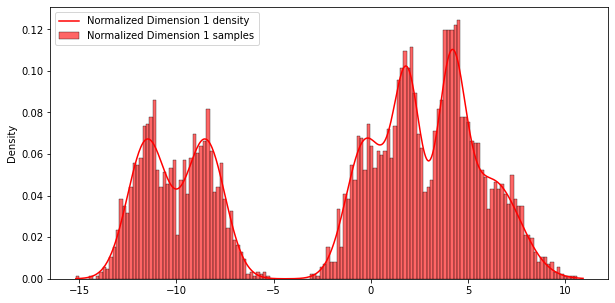

In [2]:
example =  "Normalized Dimension 1"
num_samples = 10000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  6.84it/s, loss = 1.1243354082107544]


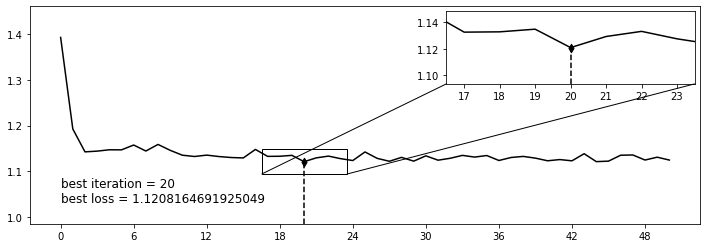

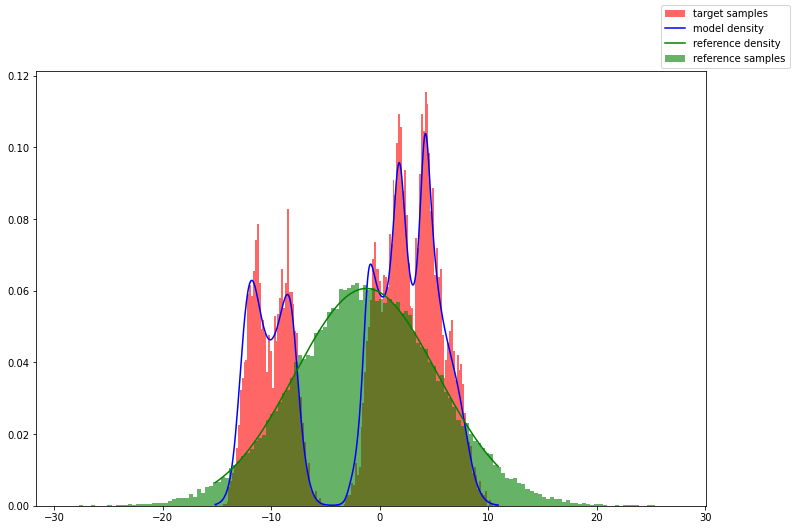

In [3]:
epochs = 50
batch_size = int(num_samples/50)
hidden_dims = [64,64,64]
ndre = NDRE(target_samples,hidden_dims)
ndre.train(epochs, batch_size)
ndre.model_visual()

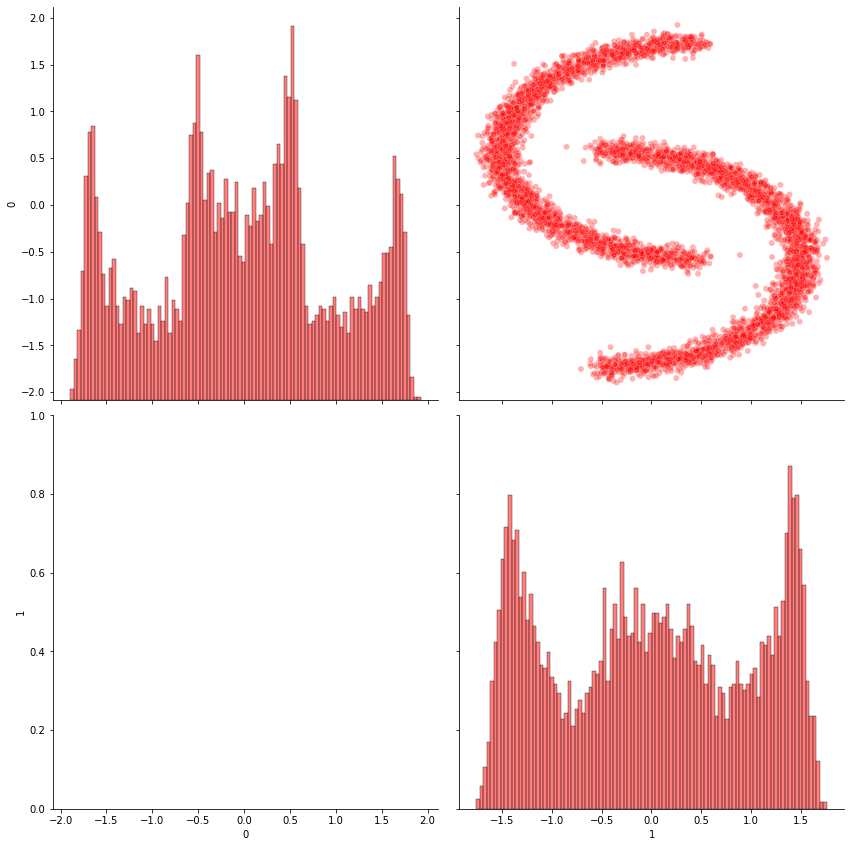

In [4]:
example =  "Moons"
num_samples = 100000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:36<00:00,  1.38it/s, loss = 0.6251868009567261]
c:\users\elouan\pycharmprojects\neural-density-ratio\venv\lib\site-packages\torch\functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


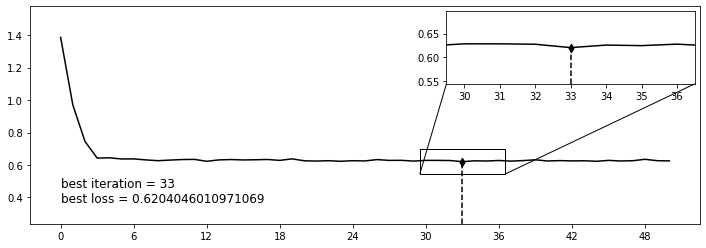

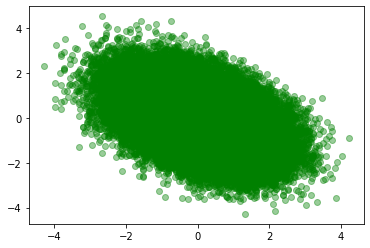

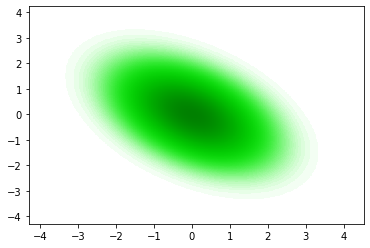

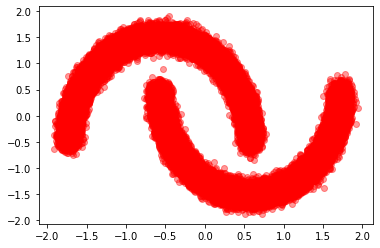

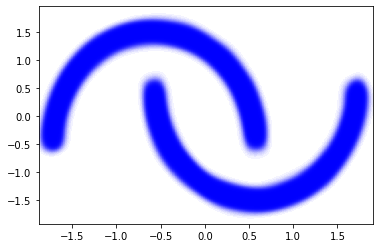

In [5]:
epochs = 50
batch_size = int(num_samples/100)
hidden_dims = [64,64,64]
ndre = NDRE(target_samples,hidden_dims)
ndre.train(epochs, batch_size)
ndre.model_visual()

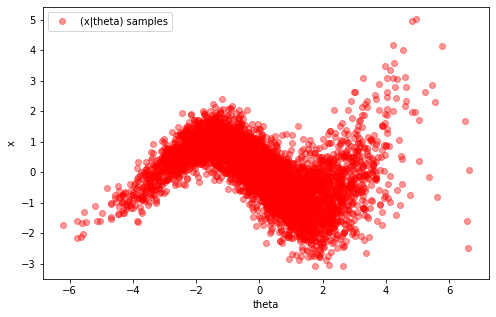

In [6]:
example =  "Gaussian Field"
num_samples = 50000
target = ConditionalTarget(example, num_samples)
x_samples , theta_samples, theta_prior, simulator = target.get_target()
target.target_visual()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.05it/s, loss = 1.1153285503387451]


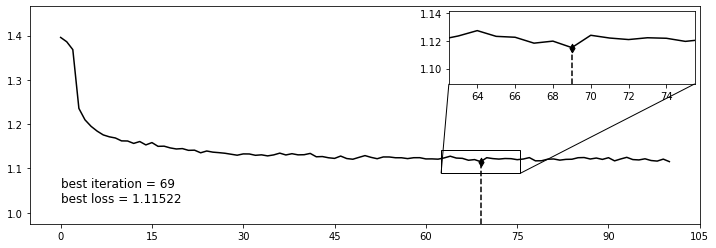

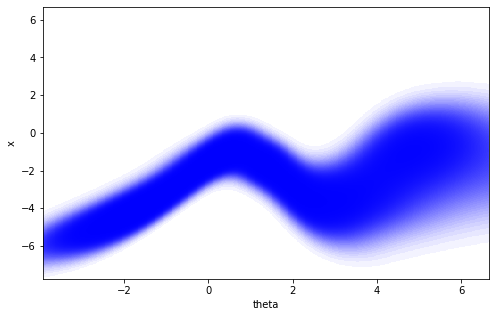

In [7]:
cnrde= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Proxy')
cnrde.train(100,500)
cnrde.model_visual()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.11it/s, loss = 1.1253712177276611]


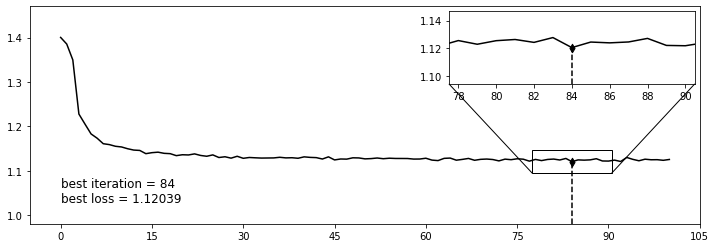

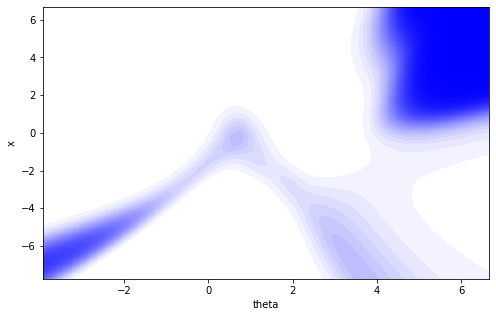

In [8]:
cnrde= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Ratio')
cnrde.train(100,500)
cnrde.model_visual()